## Iris 데이터 확인


In [ ]:
from sklearn import datasets
dataset = datasets.load_iris()

In [ ]:
print("특성 이름 : \n{}".format(dataset['feature_names']))

특성 이름 : 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("입력 데이터 : \n{}".format(dataset['data'][:5]))

입력 데이터 : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("타깃 이름 : \n{}".format(dataset['target_names']))

타깃 이름 : 
['setosa' 'versicolor' 'virginica']


In [ ]:
print("타깃 : \n{}".format(dataset['target']))

타깃 : 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## K-최근접 이웃(K-NN : K-Nearest Neighbor)

인접한 주변 데이터의 타깃 정보를 바탕으로 새로운 입력 데이터에 대한 타깃을 추론하는 알고리즘

인접한 데이터끼리 비슷한 성질을 가지고 있다는 것을 전제로 한다.



In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
dataset = datasets.load_iris()

X, y = dataset['data'], dataset['target']

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X, y)

KNeighborsClassifier()

In [ ]:
y_predicted = model.predict(X)

print('모델이 추론한 타깃 : {labels}'.format(labels=y_predicted))
print('실제 타깃 : {labels}'.format(labels=y))

모델이 추론한 타깃 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
실제 타깃 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
score = np.mean(y_predicted == y)
print("모델 정확도 : {:.3f}".format(score))

모델 정확도 : 0.967


## 프로젝트 개선하기 : train data와 test data를 분할하기

In [ ]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# iris 데이터 불러오기
dataset = datasets.load_iris()

# X, y에 학습에 필요한 데이터와 정답값으로 나누기
X, y = dataset['data'], dataset['target']

# train_test_split으로 train, test 데이터로 나누기 (test_size 미 지정시 0.75 : 0.25 비율로 나눠짐)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
len(X_train), len(y_train)

(112, 112)

In [ ]:
len(X_test), len(y_test)

(38, 38)

In [ ]:
# K-최근접 이웃 모델로 학습시키기
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 정확도 출력
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("train data acc : {:.3f}".format(train_score))
print("test data acc : {:.3f}".format(test_score))

train data acc : 0.973
test data acc : 0.974


## Overfitting, Generalization

Overfitting : 학습 데이터에서는 훌륭한 성능을 보이지만 테스트 데이터에서 성능이 떨어지는 것을 의미

Generalization : 학습된 모델이 새로운 데이터에 대해서도 추론을 잘했을 때 일반화가 잘됐다고 판단

## Numpy 실습

In [ ]:
import numpy as np

In [ ]:
# numpy 기본 array
arr = np.array([1, 3, 5, 7])

print(arr)

[1 3 5 7]


In [ ]:
arr.shape

(4,)

In [ ]:
type(arr)

numpy.ndarray

In [ ]:
arr.dtype

dtype('int64')

In [ ]:
# numpy 2차원 array
arr = np.array([[1, 3, 5, 7], [1, 2, 3, 4]])
arr

array([[1, 3, 5, 7],
       [1, 2, 3, 4]])

In [ ]:
arr.shape

(2, 4)

In [ ]:
# 0으로 구성된 array
arr0 = np.zeros((3, 3))
print(arr0)
print()

# 1로 구성된 array
arr1 = np.ones((3, 3))
print(arr1)
print()

# 0 ~ 1 사이의 실수로 구성된 array
arr_rand = np.random.rand(2, 4)
print(arr_rand)
print()

# 특정 값 사이의 정수로 구성된 array
arr_randint = np.random.randint(5, 10, size = (2, 4))
print(arr_randint)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[0.9661865  0.26546174 0.3945728  0.06601321]
 [0.92482462 0.3078267  0.94607756 0.51277286]]

[[9 6 6 6]
 [9 9 6 5]]


In [ ]:
# 특정 범위에서 일정한 간격을 갖는 arr
arr = np.arange(1, 10, 1)
print(arr)
print()

arr2 = np.arange(0.1, 1, 0.1)
print(arr2)

[1 2 3 4 5 6 7 8 9]

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [ ]:
# 배열 연산
list_data = [1, 2, 3, 4]

array_data = np.array([1, 2, 3, 4])

print(list_data * 2)
print()
print(array_data * 2)

[1, 2, 3, 4, 1, 2, 3, 4]

[2 4 6 8]


In [ ]:
# 배열 연산 응용
array_data = np.array([1, 2, 3, 4])
array_mask = array_data > 2

filterd_array = array_data[array_mask]

print(array_mask)
print()
print(filterd_array)

[False False  True  True]

[3 4]


## Pandas 실습

In [ ]:
import pandas as pd

In [ ]:
# pd.Series
sr = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sr.head()

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [ ]:
sr.tail()

5     60
6     70
7     80
8     90
9    100
dtype: int64

In [ ]:
sr = pd.Series([12, 9, 14], index = ['yesterday', 'today', 'tomorrow'])
sr

yesterday    12
today         9
tomorrow     14
dtype: int64

In [ ]:
sr.describe()

count     3.000000
mean     11.666667
std       2.516611
min       9.000000
25%      10.500000
50%      12.000000
75%      13.000000
max      14.000000
dtype: float64

In [ ]:
# pd.DataFrame
df = pd.DataFrame([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100]])
df.head()

,0,1
0,10,20
1,30,40
2,50,60
3,70,80
4,90,100


In [ ]:
df = pd.DataFrame([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100]],
                  columns = ['left', 'right'])
df

,left,right
0,10,20
1,30,40
2,50,60
3,70,80
4,90,100


In [ ]:
df['left']

0    10
1    30
2    50
3    70
4    90
Name: left, dtype: int64

## matplotlib 실습

In [2]:
import matplotlib.pyplot as plt

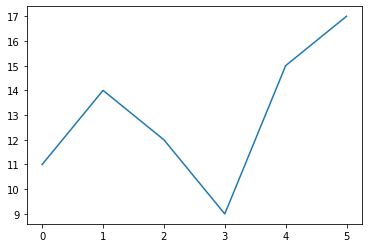

In [3]:
data = [11, 14, 12, 9, 15, 17]

plt.plot(data)
plt.show()

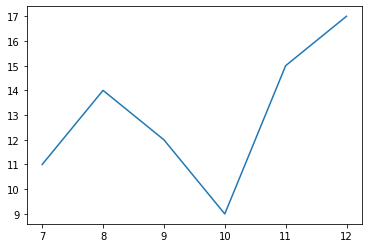

In [4]:
x_data = [7, 8, 9, 10, 11, 12]
y_data = [11, 14, 12, 9, 15, 17]

plt.plot(x_data, y_data)
plt.show()

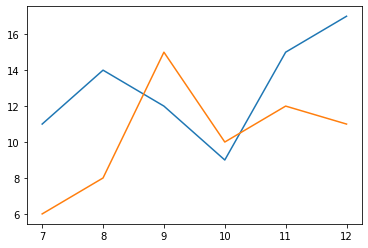

In [5]:
x_data = [7, 8, 9, 10, 11, 12]

y_data1 = [11, 14, 12, 9, 15, 17]
y_data2 = [6, 8, 15, 10, 12, 11]

plt.plot(x_data, y_data1)
plt.plot(x_data, y_data2)
plt.show()

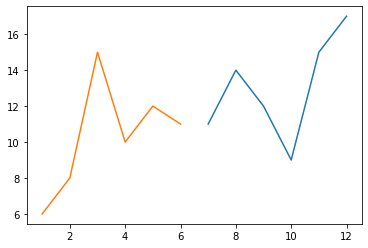

In [6]:
x_data1 = [7, 8, 9, 10, 11, 12]
x_data2 = [1, 2, 3, 4, 5, 6]

y_data1 = [11, 14, 12, 9, 15, 17]
y_data2 = [6, 8, 15, 10, 12, 11]

plt.plot(x_data1, y_data1)
plt.plot(x_data2, y_data2)
plt.show()

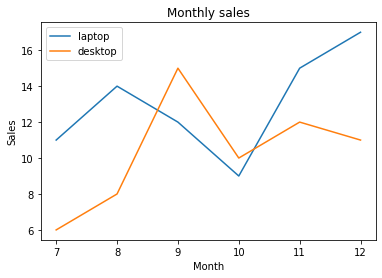

In [7]:
x_data = [7, 8, 9, 10, 11, 12]

y_data1 = [11, 14, 12, 9, 15, 17]
y_data2 = [6, 8, 15, 10, 12, 11]

# 그래프 제목
plt.title("Monthly sales")

plt.plot(x_data, y_data1, label = 'laptop')
plt.plot(x_data, y_data2, label = 'desktop')

# 축 이름 지정
plt.xlabel('Month')
plt.ylabel('Sales')

# 범례 표시
plt.legend()

plt.show()

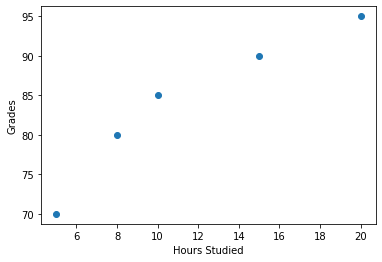

In [8]:
# 산점도 그래프
hours_studied = [5, 8, 10, 15, 20]
grades = [70, 80, 85, 90, 95]

plt.scatter(hours_studied, grades)

plt.xlabel("Hours Studied")
plt.ylabel("Grades")
plt.show()

In [9]:
# 산점도 행렬
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dataset = datasets.load_iris()

X, y = dataset['data'], dataset['target']

In [11]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
df = pd.DataFrame(X, columns = column_names)

In [12]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f573da73650>,
      dtype=object)

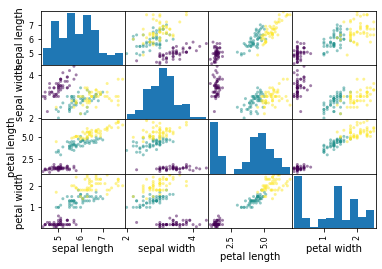

In [13]:
pd.plotting.scatter_matrix(df, c=y)